In [1]:
import missingno as msno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# 1. Exploratory Data Visualization

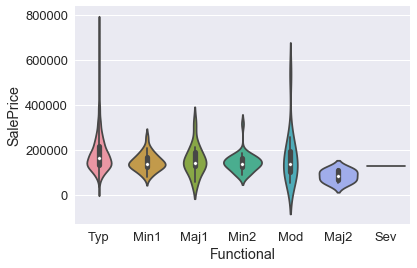

In [236]:
sns.violinplot('Functional', 'SalePrice', data=train)

## 1.2 SwarmPlot

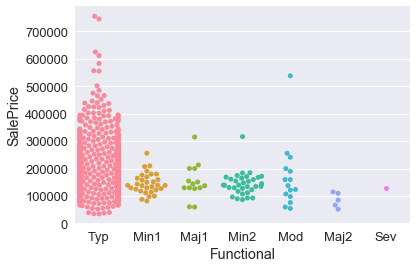

In [233]:
sns.swarmplot('Functional', 'SalePrice', data=train)

## 1.3 Regression Plot

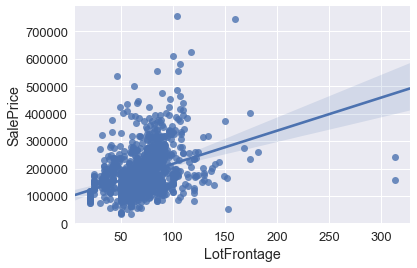

In [238]:
sns.regplot('LotFrontage', 'SalePrice', data=train)

## 1.4 PairPlot 

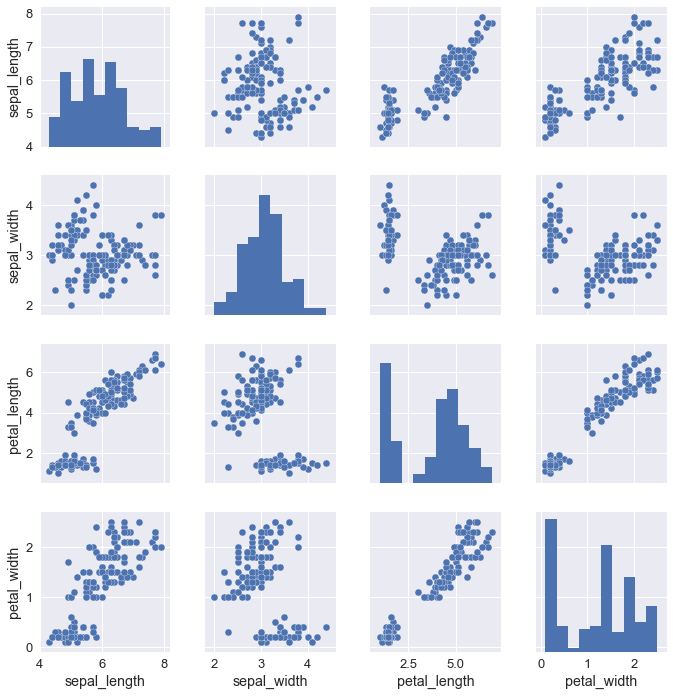

In [239]:
iris = sns.load_dataset("iris")
g = sns.pairplot(iris)

# 2. Missing Values

## 2.1 Missing Value Matrix

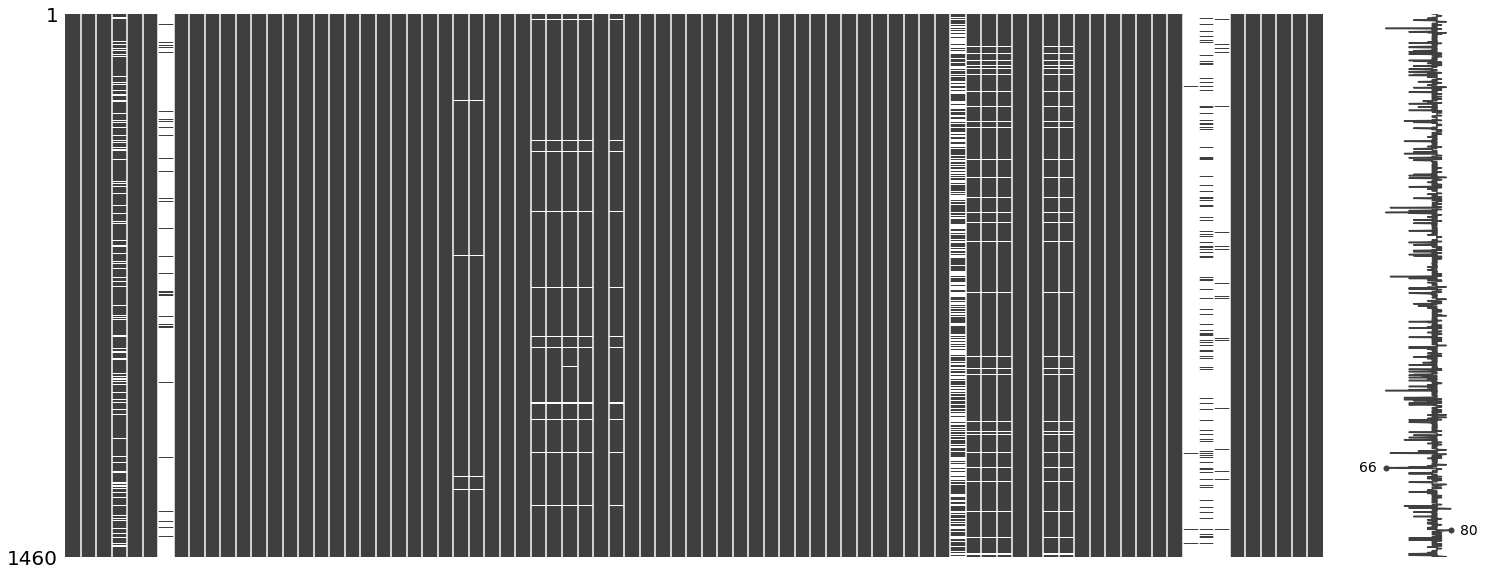

In [51]:
msno.matrix(train)

## 2.2 Visualize Train/Test Missing Values Difference

/Users/yiyangwen/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


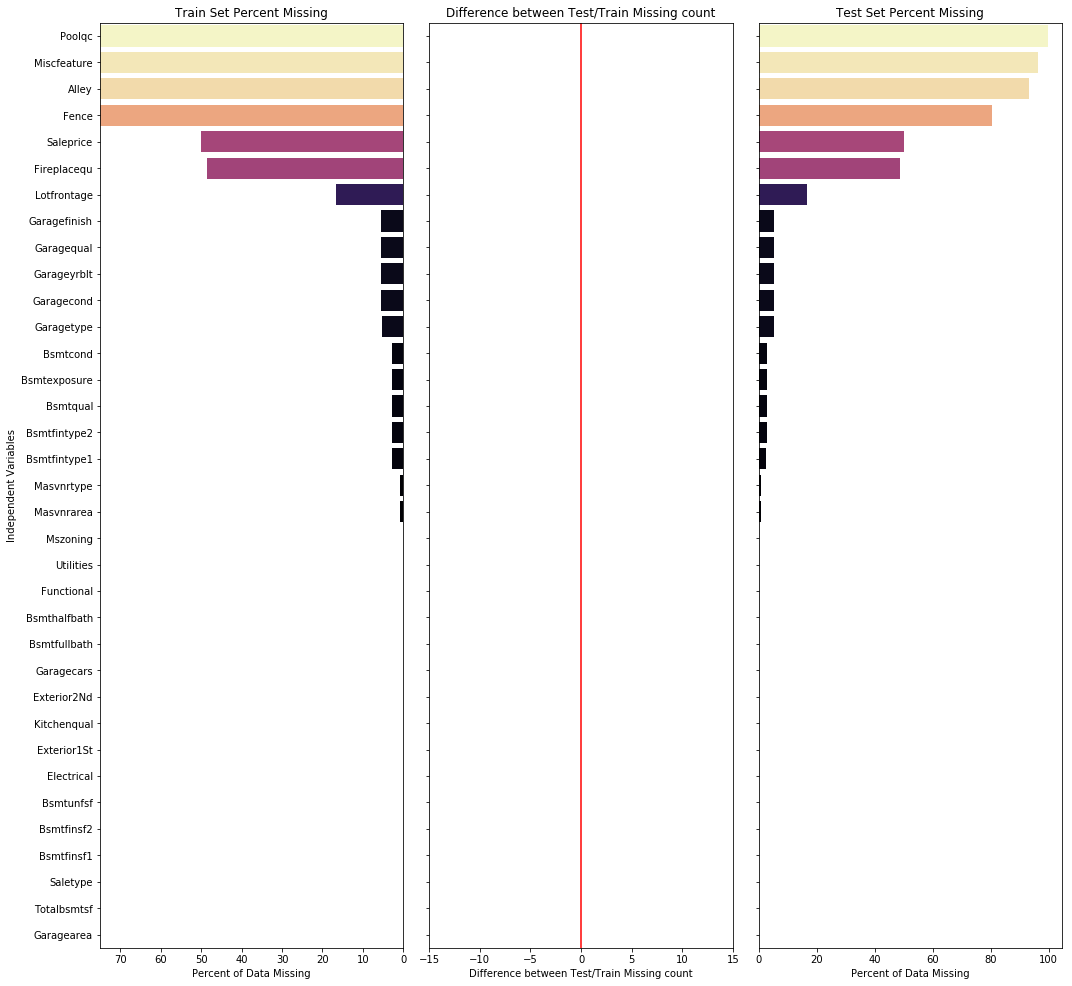

In [42]:
# Visualize Train/Test Difference
df = pd.concat([train,test],axis=0)
settypes= df.dtypes.reset_index()
traindex = train.index
testdex = test.index

def test_train_mis(test, train):
    missing_test = test.isnull().sum(axis=0).reset_index()
    missing_test.columns = ['column_name', 'test_missing_count']
    missing_test['test_missing_ratio'] = (missing_test['test_missing_count']/test.shape[0])*100
    missing_train = train.isnull().sum(axis=0).reset_index()
    missing_train.columns = ['column_name', 'train_missing_count']
    missing_train['train_missing_ratio'] = (missing_train['train_missing_count'] / train.shape[0])*100
    missing = pd.merge(missing_train, missing_test,
                       on='column_name', how='outer',indicator=True,)
    missing = pd.merge(missing,settypes, left_on='column_name', right_on='index',how='inner')
    missing = missing.loc[(missing['train_missing_ratio']>0) | (missing['test_missing_ratio']>0)]\
    .sort_values(by=["train_missing_ratio"], ascending=False)
    missing['Diff'] = missing.train_missing_ratio - missing.test_missing_ratio
    return missing

# Create
missing = test_train_mis(df.loc[testdex,:], df.loc[traindex,:])
missing["column_name"] = missing["column_name"].str.replace("_", " ").str.title()

f, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,15), sharey=True)
ax1 = sns.barplot(y ="column_name", x ="train_missing_ratio", data=missing,ax=ax1,
                  palette=plt.cm.magma(missing['train_missing_ratio']*.01))
ax1.set_xlim(75,0)
ax1.set_xlabel('Percent of Data Missing')
ax1.set_title('Train Set Percent Missing')
ax1.set_ylabel('Independent Variables')

ax2 = sns.barplot(y ="column_name", x ="Diff", data=missing,ax=ax2,
                  palette=plt.cm.magma(missing['Diff']*.01))
ax2.set_xlabel('Difference between Test/Train Missing count')
ax2.set_title('Difference between Test/Train Missing count')
ax2.set_xlim(-15,15)
ax2.axvline(x=0, c = "r")
ax2.set_ylabel('')

ax3 = sns.barplot(y ="column_name", x ="test_missing_ratio", data=missing,ax=ax3,
                  palette=plt.cm.magma(missing['test_missing_ratio']*.01))
ax3.set_xlabel('Percent of Data Missing')
ax3.set_title('Test Set Percent Missing')
ax3.set_ylabel('')

f.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## 2.3 Missing Values Clustering

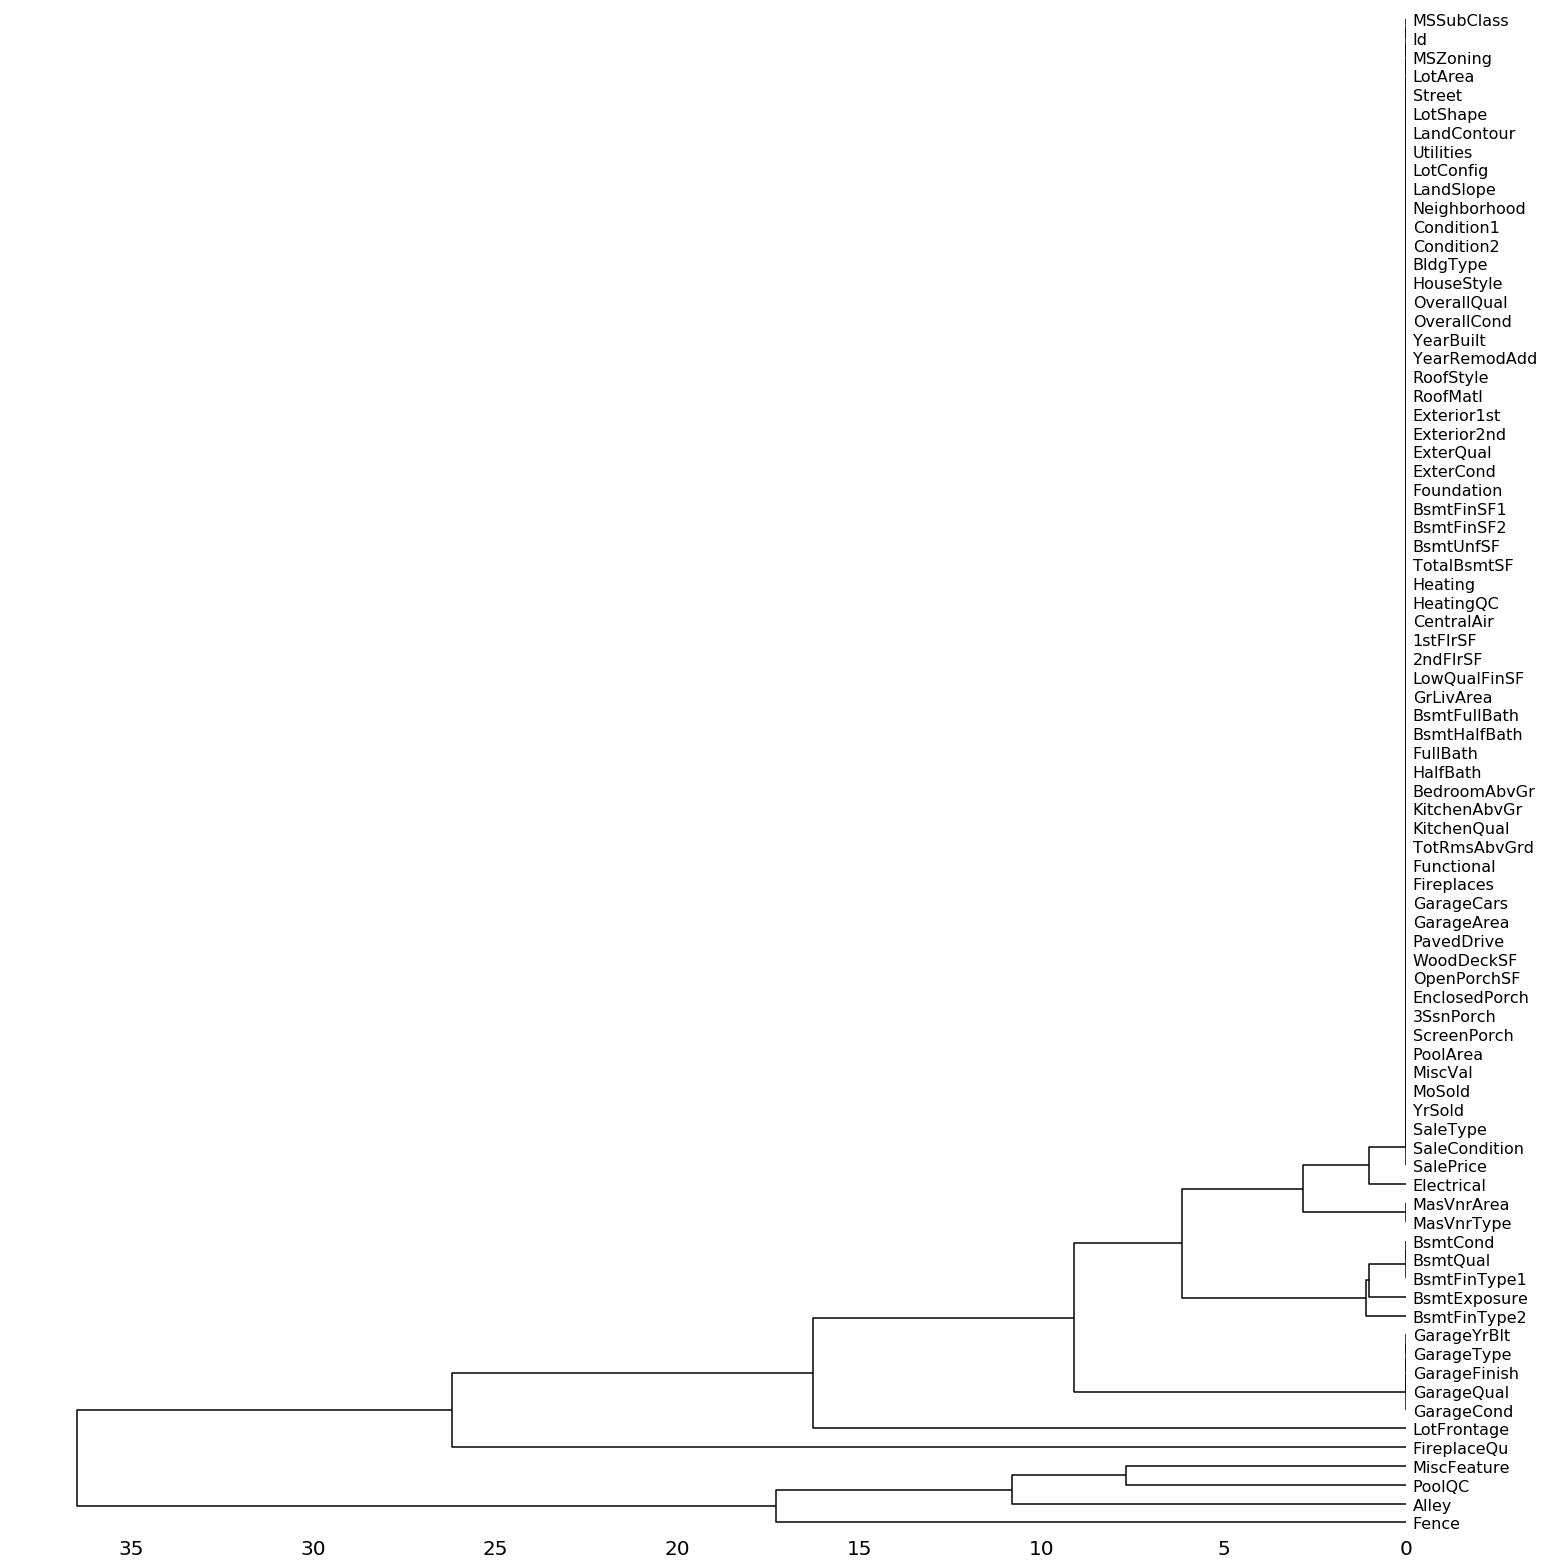

In [35]:
msno.dendrogram(train)
plt.show()

# 2.4 Nullity Correlation

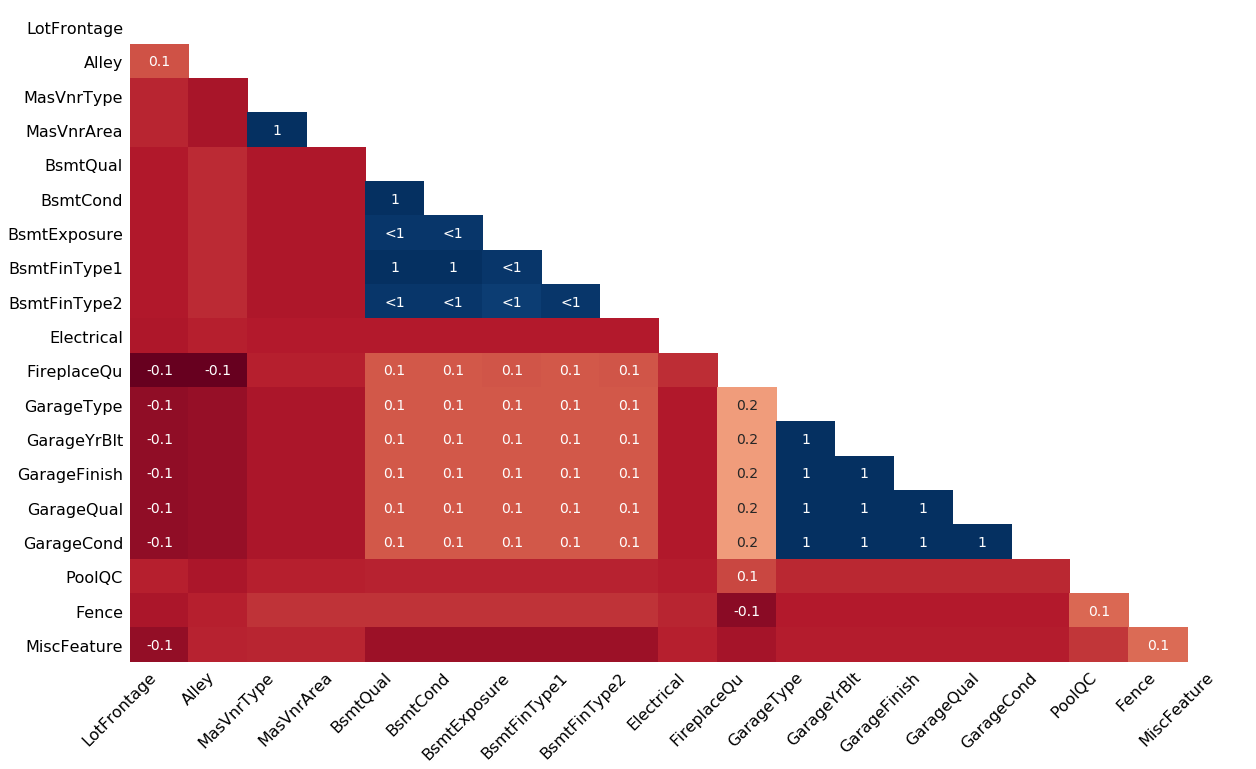

In [24]:
msno.heatmap(train)

## 2.5 Feature Importances

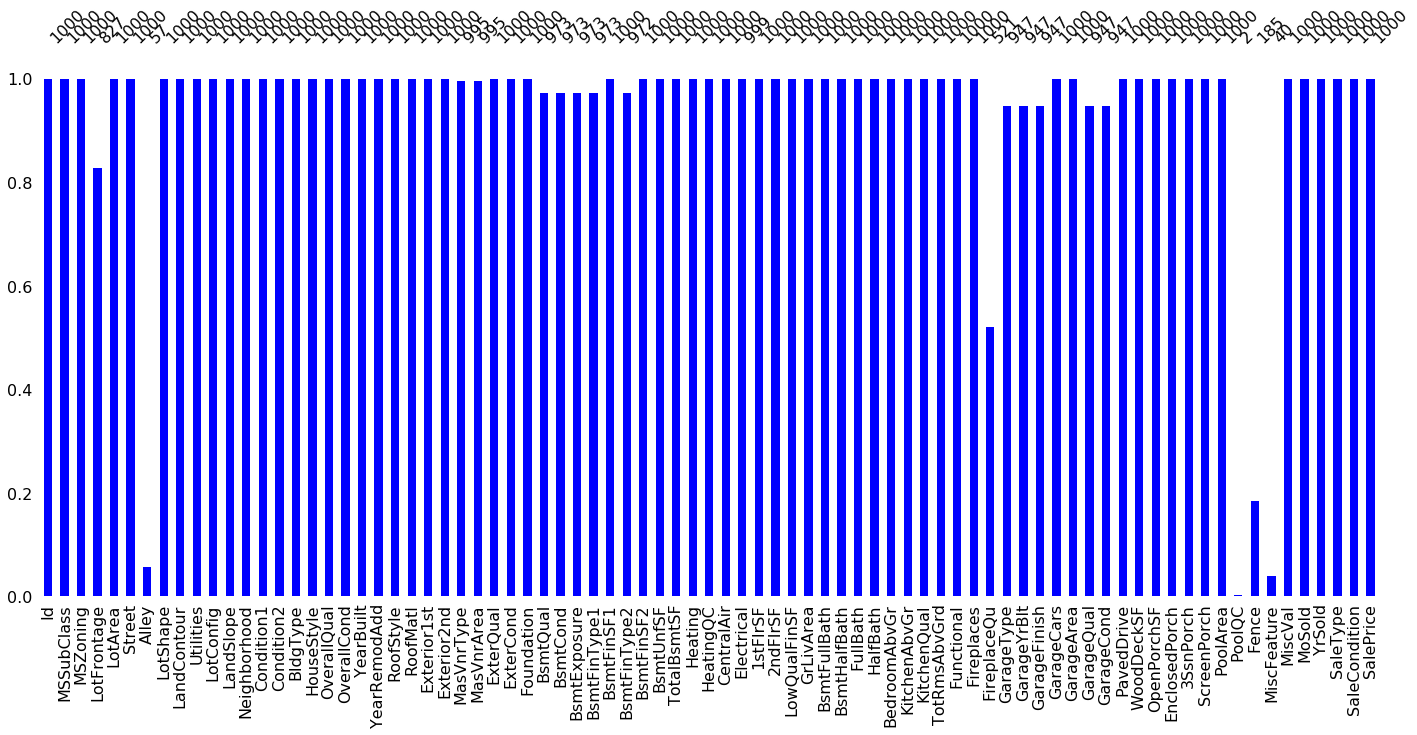

In [46]:
msno.bar(train.sample(1000), color='blue')

# 3. Feature Importances

## 3.1 Random Forest Feature Importances

Feature ranking:
1. feature 1 (0.359637)
2. feature 0 (0.056463)
3. feature 17 (0.049827)
4. feature 8 (0.046851)
5. feature 3 (0.044918)
6. feature 10 (0.043403)
7. feature 16 (0.038492)
8. feature 6 (0.037317)
9. feature 5 (0.037118)
10. feature 14 (0.036854)
11. feature 15 (0.035997)
12. feature 13 (0.034123)
13. feature 2 (0.033697)
14. feature 18 (0.033194)
15. feature 9 (0.032855)
16. feature 11 (0.030927)
17. feature 7 (0.028109)
18. feature 12 (0.015027)
19. feature 4 (0.005188)


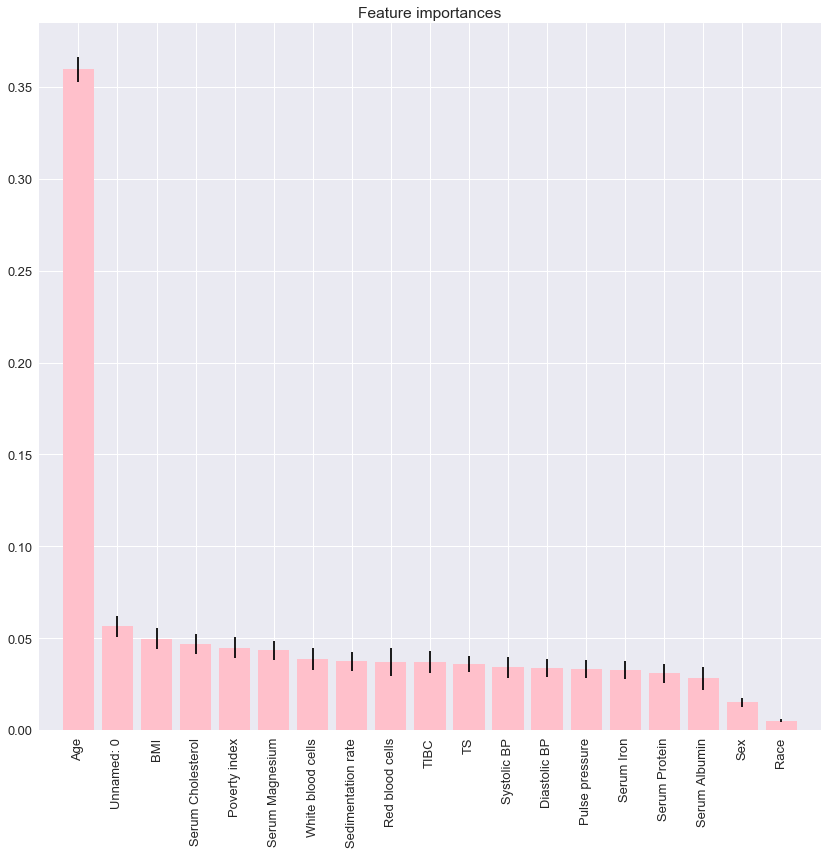

In [217]:
clf_rf = RandomForestRegressor().fit(X.fillna(-99999), y)
importances = clf_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="pink", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices],rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

## 3.2 Shap

https://www.kaggle.com/dansbecker/shap-values

In [181]:
import shap
import xgboost
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
X,y = shap.datasets.nhanesi()
rf = RandomForestRegressor().fit(X.fillna(-99999), y)
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X)

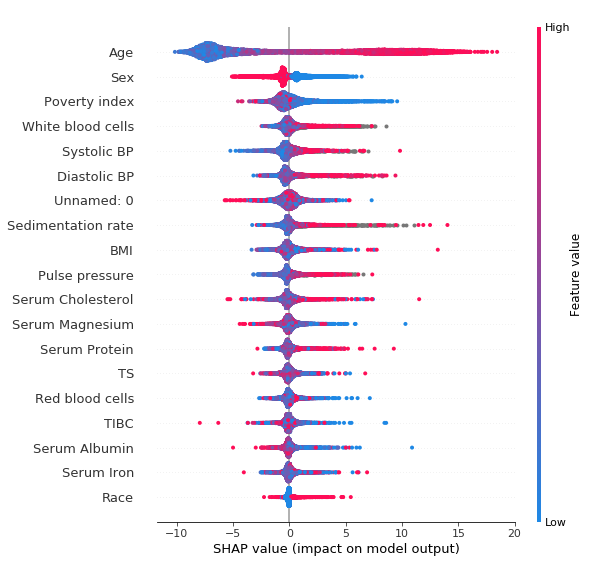

In [176]:
shap.summary_plot(shap_values, X)

In [184]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_display.iloc[0,:])

In [189]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[:100,:5], X_display.iloc[:100,:5])

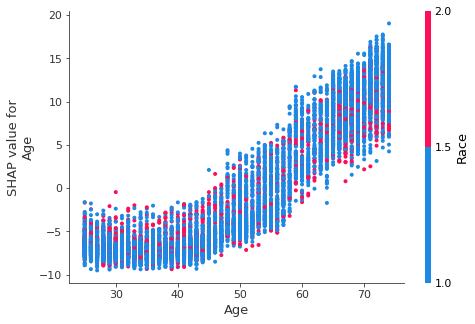

In [195]:
shap.dependence_plot("Age", shap_values, X, interaction_index="Race")

# 4. Feature Interaction

## 4.1 Factor Plot

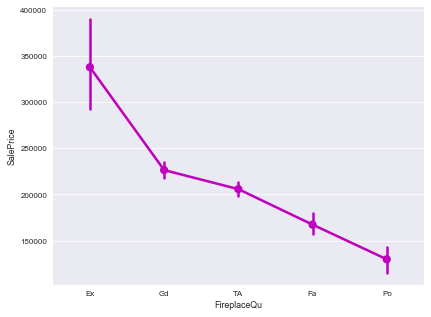

In [200]:
sns.set_style("darkgrid")
sns.factorplot('FireplaceQu', 'SalePrice', data = train, color = 'm', \
               estimator = np.mean, order = ['Ex', 'Gd', 'TA', 'Fa', 'Po'], size = 4.5,  aspect=1.35)

## 4.2 Join Plot

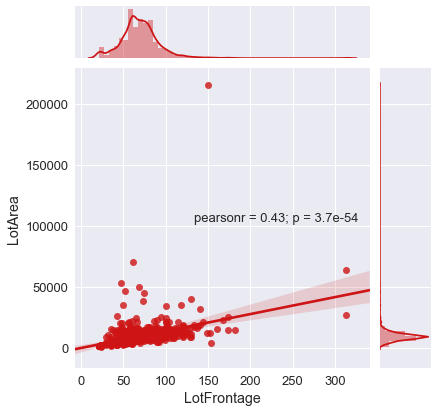

In [208]:
sns.set(font_scale=1.3)
sns.jointplot(train.loc[:,'LotFrontage'], train.loc[:,'LotArea'], kind="regg", color="#ce1414")

## 4.3 Correlation

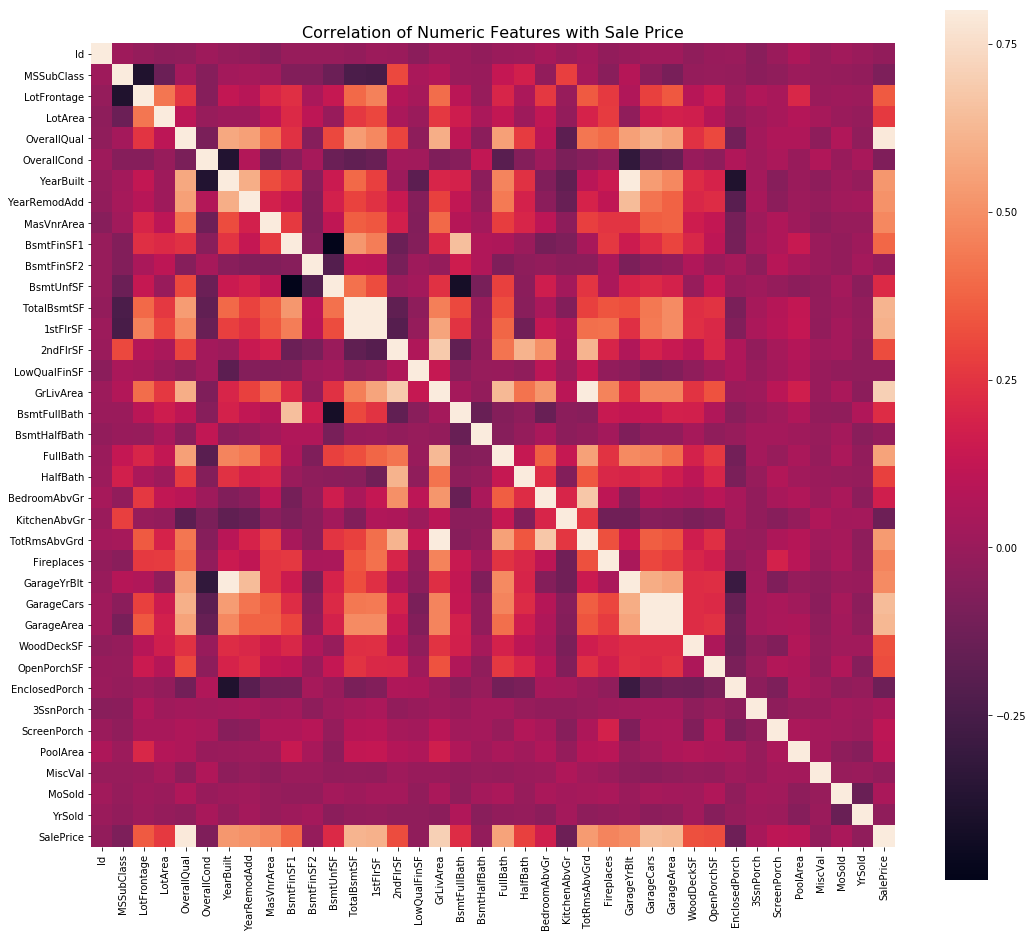

In [56]:
f , ax = plt.subplots(figsize = (18,16))
plt.title('Correlation of Numeric Features with Sale Price',y=1,size=16)
sns.heatmap(train.corr(), square = True, vmax=0.8)

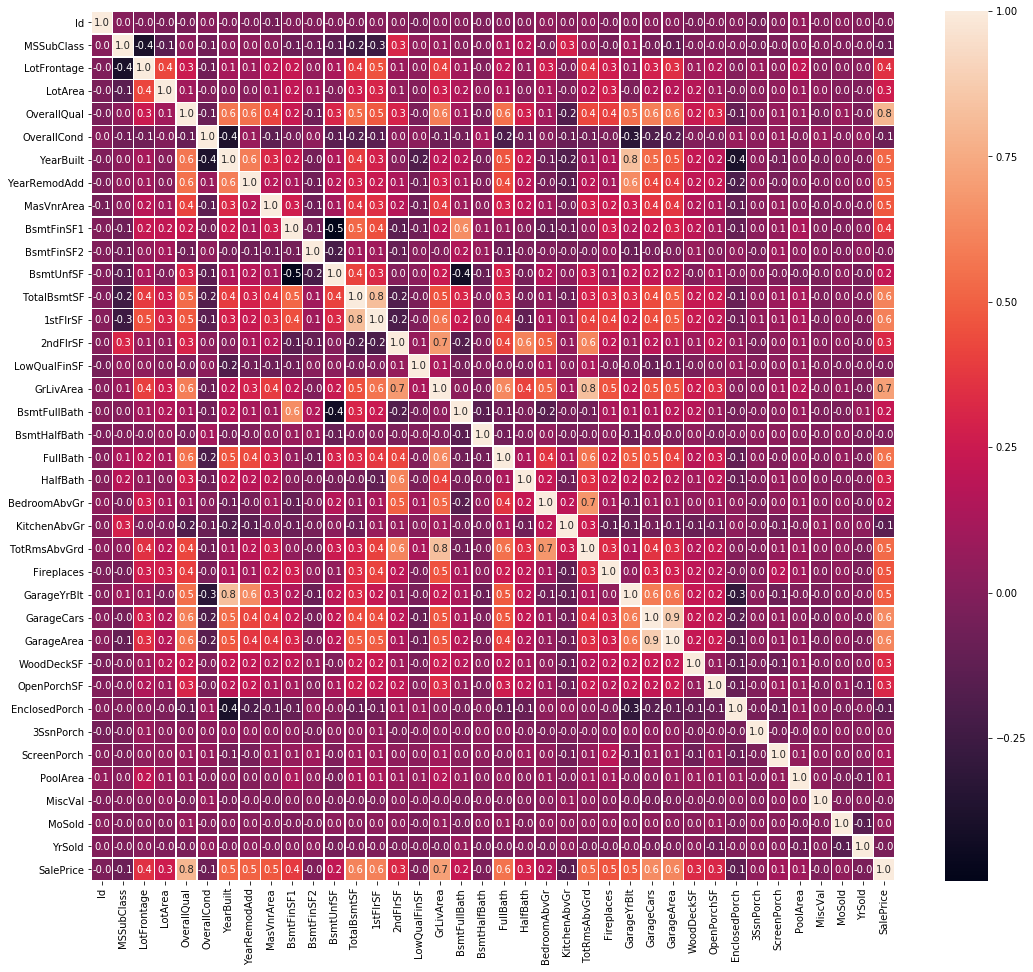

In [197]:
f,ax = plt.subplots(figsize=(18, 16))
sns.heatmap(train.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

# 5. Data Dimensionality Deduction

In [220]:
from sklearn.decomposition import PCA
pca2 = PCA(n_components=2)
pca2_results = pca2.fit_transform(X.fillna(0))

## 5.1 PCA

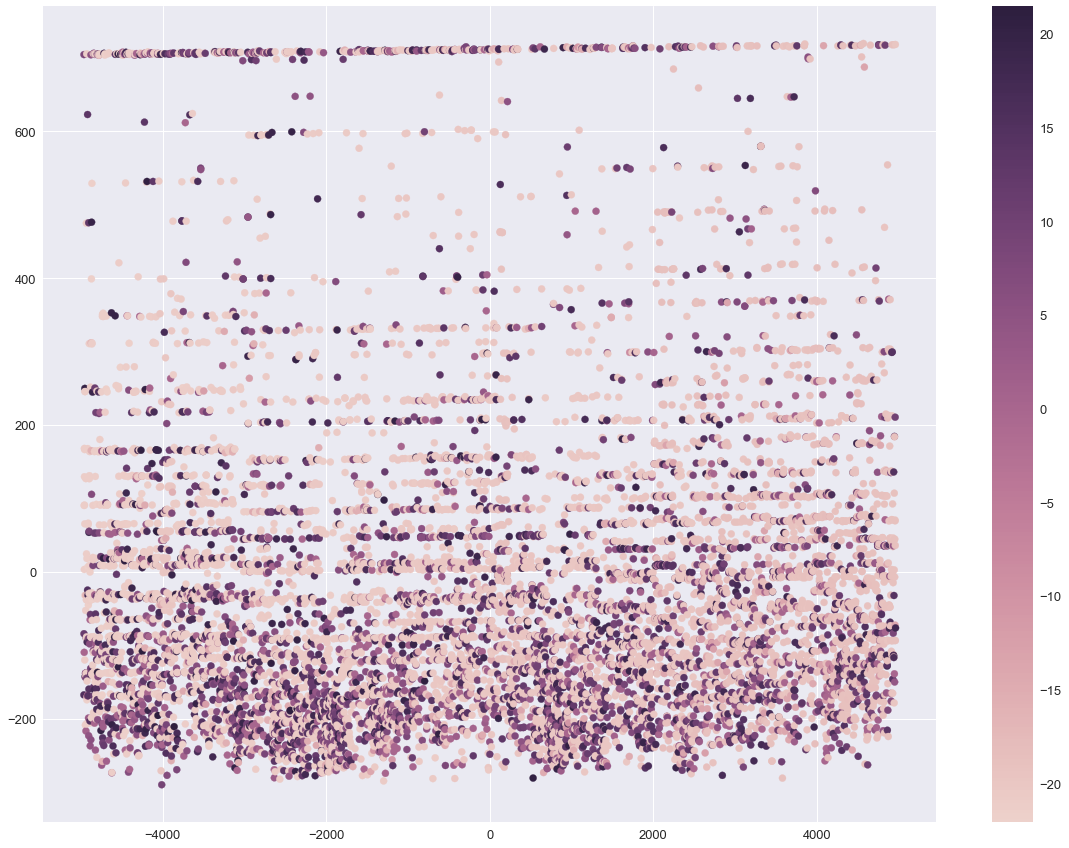

In [222]:
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots(figsize=(20,15))
points = ax.scatter(pca2_results[:,0], pca2_results[:,1], c=y, s=50, cmap=cmap)
f.colorbar(points)
plt.show()

## 5.2 T-SNE

In [226]:
from sklearn.manifold import TSNE
tsne2 = TSNE(n_components=2)
tsne2_results = tsne2.fit_transform(X.fillna(0))

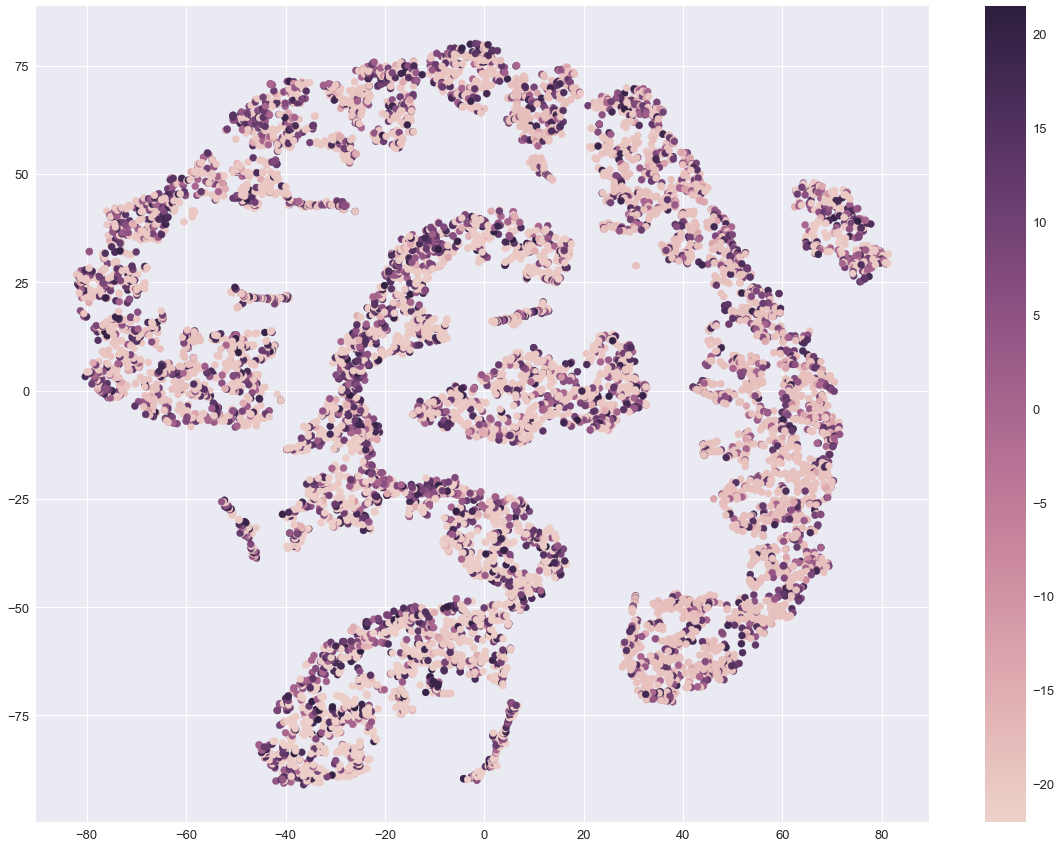

In [228]:
f, ax = plt.subplots(figsize=(20,15))
points = ax.scatter(tsne2_results[:,0], tsne2_results[:,1], c=y, s=50, cmap=cmap)
f.colorbar(points)
plt.show()

# 6. Clustering Plot

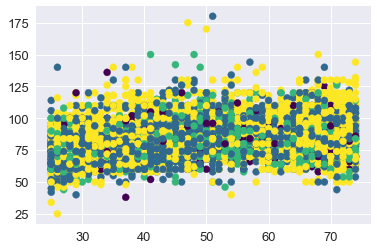

In [275]:
from sklearn.cluster import KMeans
X_part = X.iloc[:,1:]
X_part = X_part.fillna(X_part.mean())
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_part)
y_kmeans = kmeans.predict(X_part.fillna(X_part))

plt.scatter(X_part.iloc[:, 0], X_part.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')

# 7. GeoPlot

https://python-visualization.github.io/folium/quickstart.html#Getting-Started

https://www.kaggle.com/shivamb/hunting-for-insights-geo-maps/notebook

In [2]:
import numpy as np 
import pandas as pd 
import folium
from folium import plugins
from io import StringIO
import geopandas as gpd
from pprint import pprint 
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import plotly.plotly as py
from plotly import tools
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import seaborn as sns
import os 
init_notebook_mode(connected=True)

In [243]:
depts = [f for f in os.listdir("./data-science-for-good/") if f.startswith("Dept")]

In [246]:
path = "./data-science-for-good/Dept_35-00103/35-00103_UOF-OIS-P_prepped.csv"
incidents = pd.read_csv(path)
incidents.head()

INCIDENT_UNIQUE_IDENTIFIER INCIDENT_DATE     SUBJECT_RACE  \
0                INCIDENT_ID    YEAR_MONTH  INDIVIDUAL_RACE   
1                       1649       2005-03            Black   
2                       1739       2005-03            White   
3                       1953       2005-05            White   
4                       2421       2005-08            Black   

      SUBJECT_GENDER SUBJECT_AGE_IN_YEARS     SUBJECT_INJURY_TYPE  \
0  INDIVIDUAL_GENDER       INDIVIDUAL_AGE  INDIVIDUAL_INJURY_TYPE   
1               Male                   33                    Miss   
2               Male                   25        Non-Fatal Injury   
3               Male                   67            Fatal Injury   
4               Male                   25                    Miss   

  LOCATION_LATITUDE LOCATION_LONGITUDE  \
0          Latitude          Longitude   
1       35.22449626       -80.89650368   
2       35.22699116       -80.72929894   
3       35.19902512       -80.75628578   
4        35.2193387       -80.87636738   

  LOCATION_FULL_STREET_ADDRESS_OR_INTERSECTION  
0                                     Location  
1         WILKINSON BOULEVARD, CHARLOTTE 28208  
2            KEYWAY BOULEVARD, CHARLOTTE 28205  
3         AMITY SPRINGS DRIVE, CHARLOTTE 28212  
4                 BETHEL ROAD, CHARLOTTE 28208

In [250]:
kmap = folium.Map([35.22, -80.89], height=400, zoom_start=10, tiles='CartoDB dark_matter')
for j, rown in incidents[1:].iterrows():
    if str(rown["LOCATION_LONGITUDE"]) != "nan":
        lon = float(rown["LOCATION_LATITUDE"])
        lat = float(rown["LOCATION_LONGITUDE"])
        folium.CircleMarker([lon, lat], radius=5, color='red', fill=True).add_to(kmap)
kmap

In [252]:
kmap = folium.Map([35.22, -80.89], height=400, zoom_start=10, tiles='Stamen Terrain')
for j, rown in incidents[1:].iterrows():
    if str(rown["LOCATION_LONGITUDE"]) != "nan":
        lon = float(rown["LOCATION_LATITUDE"])
        lat = float(rown["LOCATION_LONGITUDE"])
        folium.CircleMarker([lon, lat], radius=5, color='red', fill=True).add_to(kmap)
kmap

In [267]:
kmap = folium.Map([35.22, -80.89], height=400, zoom_start=10, tiles='Stamen Toner')
for j, rown in incidents[1:].iterrows():
    if str(rown["LOCATION_LONGITUDE"]) != "nan":
        lon = float(rown["LOCATION_LATITUDE"])
        lat = float(rown["LOCATION_LONGITUDE"])
        folium.CircleMarker([lon, lat], radius=5, color='red', fill=True).add_to(kmap)
kmap

# Comp

In [134]:
chr_ = pd.read_csv('Book1.csv')
chr_.columns = chr_.iloc[0]
chr_ = chr_.iloc[1:]
chr_.index = chr_.FIPS

In [138]:
var = 'Quartile'
r = chr_[var].iloc[:,[0]]
r.index = list(map(lambda x:int(x), r.index))
r[var] = list(map(lambda x:int(x) if x!='NR' else np.nan, r[var]))
r.index  = r.index.set_names('FIPS_Code')

In [139]:
for i in employed_series.index:
    if i not in r.index:
        r.loc[i] = np.nan
        
# for i in r.index:
#     if i not in employed_series.index:
#         r.drop(r.index[i])

In [140]:
# r_ = r.loc[employed_series.index]
# r_['Rank'] = employed_series.values

In [144]:
import branca

county_data = os.path.join('data', 'us_county_data.csv')
county_geo = os.path.join('data', 'us_counties_20m_topo.json')

df = pd.read_csv(county_data, na_values=[' '])

colorscale = branca.colormap.linear.YlOrRd_09.scale(0, 50e3)
employed_series = df.set_index('FIPS_Code')['Employed_2011']


def style_function(feature):
    employed = (r[var] * 10000).fillna(0).get(int(feature['id'][-5:]), None)
    return {
        'fillOpacity': 0.5,
        'weight': 0,
        'fillColor': '#black' if employed is None else colorscale(employed)
    }


m = folium.Map(
    location=[48, -102],
    tiles='cartodbpositron',
    zoom_start=3
)

folium.TopoJson(
    open(county_geo),
    'objects.us_counties_20m',
    style_function=style_function
).add_to(m)

m

http://boundaries.latimes.com/set/zip-code-tabulation-areas-2012/
    
https://towardsdatascience.com/visualizing-data-at-the-zip-code-level-with-folium-d07ac983db20 

HeapMap
https://alysivji.github.io/getting-started-with-folium.html

https://www.kaggle.com/poonaml/last-cab-to-new-york-animated-heatmap-trips-folium

# 8. Other Plots

ts: sns.lineplot()

https://www.kaggle.com/typewind/draw-a-radar-chart-with-python-in-a-simple-way

https://plot.ly/python/bubble-charts/